<a href="https://colab.research.google.com/github/yael-vinker/CLIPasso/blob/main/CLIPasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIPasso: Semantically-Aware Object Sketching

Note that the colab version is slower.
For faster sketching with multiprocessing please refer to the github repository and follow the running instructions.


**Define your target image**<br>
You can upload your own target image to sketch, please place it under "CLIPasso/target_images/".



# (1) Install Dependencies and Clone the Repo

This stage might take a few minutes

*   Make sure your Hardware accelerator is set to GPU: Runtime > Change runtime type > Hardware Accelerator 
*   Make sure to **restart the runtime** after this stage is done





In [ ]:
%cd /usr/local/
!pwd
!ls
!rm -rf cuda
!ln -s /usr/local/cuda-10.1 /usr/local/cuda
!stat cuda
!nvcc --version

%cd /content/
!git clone https://github.com/yael-vinker/CLIPasso.git
%cd CLIPasso
!pip install -r requirements.txt
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html



/usr/local
/usr/local
bin	   cuda-10.1  cuda-11.1  _gcs_config_ops.so  licensing	share
cuda	   cuda-11    etc	 include	     man	src
cuda-10.0  cuda-11.0  games	 lib		     sbin	xgboost
  File: cuda -> /usr/local/cuda-10.1
  Size: 20        	Blocks: 0          IO Block: 4096   symbolic link
Device: 24h/36d	Inode: 3801091     Links: 1
Access: (0777/lrwxrwxrwx)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2022-03-21 12:54:15.647125810 +0000
Modify: 2022-03-21 12:54:15.540125904 +0000
Change: 2022-03-21 12:54:15.540125904 +0000
 Birth: -
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
/content
Cloning into 'CLIPasso'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (319/319), done.
remote: Compressing objects: 100% (251/251), done.
remote: Total 319 (delta 166), reused 131 (delta 55), pack-reused 0
Receiving objects: 100% (319/319), 9.33 M

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 21.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.2
    Uninstalling torchvision-0.8.2:
      Successfully uninstalled torchvision-0.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1+cu101 which is incompatible.


In [ ]:
%cd /content/CLIPasso
!git pull

/content/CLIPasso
Already up to date.


In [ ]:
%cd /content/CLIPasso
!pip install git+https://github.com/openai/CLIP.git
!git clone https://github.com/BachiLi/diffvg
%cd diffvg
!git submodule update --init --recursive
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
import sys
sys.path.append("/content/CLIPasso/diffvg/build/lib.linux-x86_64-3.7")
!pip3 install --upgrade Pillow
!python setup.py install

/content/CLIPasso
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-tlgrbiuo
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-tlgrbiuo
  Resolved https://github.com/openai/CLIP.git to commit 40f5484c1c74edd83cb9cf687c6ab92b28d8b656
fatal: destination path 'diffvg' already exists and is not an empty directory.
/content/CLIPasso/diffvg
TensorFlow 1.x selected.
1.15.2
running install
running bdist_egg
running egg_info
writing diffvg.egg-info/PKG-INFO
writing dependency_links to diffvg.egg-info/dependency_links.txt
writing requirements to diffvg.egg-info/requires.txt
writing top-level names to diffvg.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'diffvg.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
-- pybind11 v2.6.0 dev
-- Using pybind11: (version "2.6.0" dev)
-- Build with CUDA support
-- Configuring done
-- Generating do

# (2) Start Sketching 🎨

This stage will take a few minutes.

We provide a few input examples under "CLIPasso/target_images". 
<br>You can sketch your own input by simply placing the desired image in "CLIPasso/target_images" and specifying the image name under "target_image".

**A few notes:**<br>

*   It is recommended to use images without a background, however, if your image contains a background, you can mask it out by using inserting 1 to "**mask_object**" field below.
*   If your image is not squared, it might be cut off. In that case it is recommended to fill the "**fix_scale**" field with 1 to automatically fix the scale.
*   You can define the abstraction level by using the "**num_strokes**" parameter. This parameter defines the number of strokes used to create the sketch. For example, optional values can be 32, 16, 8 and even 4.

You can download the resulting sketch in SVG format from CLIPasso/output_sketches/\<target_image_name\>/best_iter.svg

/content/CLIPasso
Already up to date.
Processing [camel.png] ...


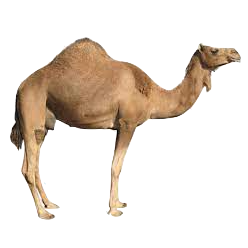

Results will be saved to 
[/content/CLIPasso/output_sketches/camel/] ...
GPU: True


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 135MB/s]
100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 116MiB/s]
100%|███████████████████████████████████████| 278M/278M [00:12<00:00, 23.8MiB/s]
100%|██████████| 2001/2001 [26:06<00:00,  1.28it/s]


In [ ]:
%cd /content/CLIPasso
!git pull

%matplotlib inline
target_image = "camel.png" #@param {"type": "string"}
mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes = 16 #@param {"type": "integer"}

%run run_object_sketching.py --target_file $target_image --num_sketches 3 -colab --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes

# (3) Display Results

/content/CLIPasso
Already up to date.


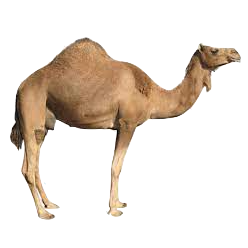

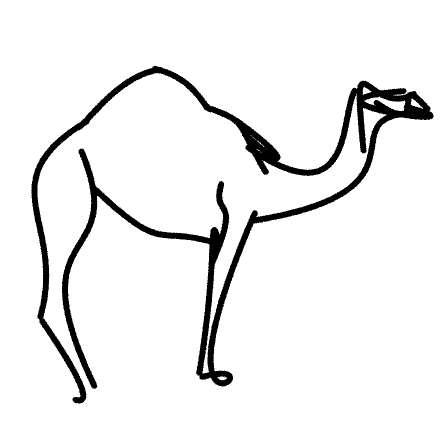

You can download the result sketch from /content/CLIPasso/output_sketches/camel/camel_16strokes_seed0/final_sketch.png
/content/CLIPasso/output_sketches/camel/camel_16strokes_seed0


In [ ]:
%cd /content/CLIPasso/
!git pull

target_image = "camel.png" #@param {"type": "string"}
%run display_results.py --target_file $target_image

In [ ]:
%cd /content/CLIPasso/

import re
import os
import subprocess as sp
import moviepy.editor as mvp
from IPython.display import clear_output

target_image = "camel.png" #@param {"type": "string"}

abs_path = os.path.abspath(os.getcwd())
result_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}"
svg_files = os.listdir(result_path)
svg_files = [f for f in svg_files if "best.svg" in f]

p = re.compile("_best")
best_sketch_dir = ""
for m in p.finditer(svg_files[0]):
    best_sketch_dir += svg_files[0][0: m.start()]

cur_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}/{best_sketch_dir}"
sp.run(["ffmpeg", "-y", "-framerate", "10", "-pattern_type", "glob", "-i", 
            f"{cur_path}/svg_to_png/iter_*.png", "-vb", "20M", f"{cur_path}/sketch.mp4"])

sp.run(["ffmpeg", "-y", "-i", f"{cur_path}/sketch.mp4", "-filter_complex",
    "[0]trim=0:2[hold];[0][hold]concat[extended];[extended][0]overlay",
    f"{cur_path}/sketch_longer.mp4"])

clear_output()
display(mvp.ipython_display(f"{cur_path}/sketch_longer.mp4"))